# Our Question: What socioeconomic factors contribute most to racial disparities in morbidity from COVID-19? 

### Approach: 
1. Identify which regions have the highest disparities in outcomes from COVID-19 by race/ethnicity. 
   Specifically, this means which states have higher % of deaths per population of interest than the    percentage of that group in the population in total. 

2. Identify the underlying causes contributing to the disparity. 
   Specifically, we will investigate: 
   * socioeconomic factors
   * household composition & disability
   * minority status & language
   * housing type & transportation
   * underlying health conditions 
   * the state of the community's healthcare system

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Identify the states with the highest disparities in COVID-19 Outcomes by race/ethnicity

Disparity = 
% COVID-19 deaths -  % population

#### Data: 
Data was collected and normalized by the CDC. It was downloaded on May 13, 2020 from: 
https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm

Importantly, the percentage of racial/ethnic groups per state population that is reported has been weighted. These weights ensure that the population estimates and percentage of COVID deaths represent comparable geographic areas. To see more details on how the weighted percentages were calculated, please visit: https://www.cdc.gov/nchs/nvss/vsrr/covid19/tech_notes.htm

In [54]:
# Weighted distribution of races/ethnicity - CDC data 
wt_dist = pd.read_csv('cdc_weighted_distributions_race.csv')
wt_dist.info()
wt_dist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
State                                                          28 non-null object
State Abbreviation                                             27 non-null object
%Covid_deaths_Non-Hispanic White                               28 non-null float64
%Covid_deaths_Non-Hispanic Black or African American           28 non-null object
%Covid_deaths_Non-Hispanic American Indian or Alaska Native    28 non-null object
%Covid_deaths_Non-Hispanic Asian                               28 non-null object
%Covid_deaths_Hispanic or Latino                               28 non-null object
%Covid_deaths_Other                                            28 non-null object
%population_Non-Hispanic White                                 28 non-null float64
%population_Non-Hispanic Black or African American             28 non-null float64
%population_Non-Hispanic American Indian or Alaska Native      28 non-null

,State,State Abbreviation,%Covid_deaths_Non-Hispanic White,%Covid_deaths_Non-Hispanic Black or African American,%Covid_deaths_Non-Hispanic American Indian or Alaska Native,%Covid_deaths_Non-Hispanic Asian,%Covid_deaths_Hispanic or Latino,%Covid_deaths_Other,%population_Non-Hispanic White,%population_Non-Hispanic Black or African American,%population_Non-Hispanic American Indian or Alaska Native,%population_Non-Hispanic Asian,%population_Hispanic or Latino,%population_Other
0,United States,NaN,52.1,21.2,0.3,6.1,16.5,3.8,40.4,18.4,0.2,12.1,26.9,1.9
1,Alabama,AL,52.1,44.5,0,-,-,0,56.6,35.7,0.4,2.1,3.8,1.4
2,Arizona,AZ,52.8,-,23.8,-,18.1,-,54.6,5.2,2.1,4.1,31.9,2.2
3,California,CA,40.2,9.6,-,18.3,30.1,1.3,28.3,7.5,0.2,15.1,46.6,2.3
4,Colorado,CO,68.5,7.7,0,4.4,18,-,62.8,6.4,0.5,4.2,23.5,2.6


In [60]:
# this is not elegant 
wt_dist.fillna(0, inplace=True)
wt_dist.replace('-',0,inplace=True)
wt_dist['State Abbreviation'][0] = 'USA'
wt_dist['%Covid_deaths_Non-Hispanic Black or African American'] = wt_dist['%Covid_deaths_Non-Hispanic Black or African American'].astype(float)
wt_dist['%Covid_deaths_Non-Hispanic American Indian or Alaska Native'] = wt_dist['%Covid_deaths_Non-Hispanic American Indian or Alaska Native'].astype(float)
wt_dist['%Covid_deaths_Non-Hispanic Asian'] = wt_dist['%Covid_deaths_Non-Hispanic Asian'].astype(float)
wt_dist['%Covid_deaths_Hispanic or Latino'] = wt_dist['%Covid_deaths_Hispanic or Latino'].astype(float)
wt_dist['%Covid_deaths_Other'] = wt_dist['%Covid_deaths_Other'].astype(float)
wt_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 20 columns):
State                                                          28 non-null object
State Abbreviation                                             28 non-null object
%Covid_deaths_Non-Hispanic White                               28 non-null float64
%Covid_deaths_Non-Hispanic Black or African American           28 non-null float64
%Covid_deaths_Non-Hispanic American Indian or Alaska Native    28 non-null float64
%Covid_deaths_Non-Hispanic Asian                               28 non-null float64
%Covid_deaths_Hispanic or Latino                               28 non-null float64
%Covid_deaths_Other                                            28 non-null float64
%population_Non-Hispanic White                                 28 non-null float64
%population_Non-Hispanic Black or African American             28 non-null float64
%population_Non-Hispanic American Indian or Alaska Native      28 non

C:\Users\kmuss\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [61]:
wt_dist['disparity_white'] = wt_dist['%Covid_deaths_Non-Hispanic White'] - wt_dist['%population_Non-Hispanic White']
wt_dist['disparity_black'] = wt_dist['%Covid_deaths_Non-Hispanic Black or African American'] - wt_dist['%population_Non-Hispanic Black or African American']
wt_dist['disparity_AIAN'] = wt_dist['%Covid_deaths_Non-Hispanic American Indian or Alaska Native'] - wt_dist['%population_Non-Hispanic American Indian or Alaska Native']
wt_dist['disparity_asian'] = wt_dist['%Covid_deaths_Non-Hispanic Asian'] - wt_dist['%population_Non-Hispanic Asian']
wt_dist['disparity_hispanic'] = wt_dist['%Covid_deaths_Hispanic or Latino'] - wt_dist['%population_Hispanic or Latino']
wt_dist['disparity_other'] = wt_dist['%Covid_deaths_Other'] - wt_dist['%population_Other']
wt_dist.head()

,State,State Abbreviation,%Covid_deaths_Non-Hispanic White,%Covid_deaths_Non-Hispanic Black or African American,%Covid_deaths_Non-Hispanic American Indian or Alaska Native,%Covid_deaths_Non-Hispanic Asian,%Covid_deaths_Hispanic or Latino,%Covid_deaths_Other,%population_Non-Hispanic White,%population_Non-Hispanic Black or African American,%population_Non-Hispanic American Indian or Alaska Native,%population_Non-Hispanic Asian,%population_Hispanic or Latino,%population_Other,disparity_white,disparity_black,disparity_AIAN,disparity_asian,disparity_hispanic,disparity_other
0,United States,USA,52.1,21.2,0.3,6.1,16.5,3.8,40.4,18.4,0.2,12.1,26.9,1.9,11.7,2.8,0.1,-6.0,-10.4,1.9
1,Alabama,AL,52.1,44.5,0.0,0.0,0.0,0.0,56.6,35.7,0.4,2.1,3.8,1.4,-4.5,8.8,-0.4,-2.1,-3.8,-1.4
2,Arizona,AZ,52.8,0.0,23.8,0.0,18.1,0.0,54.6,5.2,2.1,4.1,31.9,2.2,-1.8,-5.2,21.7,-4.1,-13.8,-2.2
3,California,CA,40.2,9.6,0.0,18.3,30.1,1.3,28.3,7.5,0.2,15.1,46.6,2.3,11.9,2.1,-0.2,3.2,-16.5,-1.0
4,Colorado,CO,68.5,7.7,0.0,4.4,18.0,0.0,62.8,6.4,0.5,4.2,23.5,2.6,5.7,1.3,-0.5,0.2,-5.5,-2.6


**Visualizations made in Tableau**
https://public.tableau.com/profile/kristin.mussar#!/vizhome/maps_of_disparity_state/White

## 2. Identify the underlying causes contributing to the disparity

### Approach: 
- Merge in social determinates of health data and census data to our data on deaths/ethnic group. 
- Compare regions with similar racial percentages, but disparate outcomes. Look to see which social determinates of health are different between the 2 regions. 

### Data: 
* The Surgo Foundation has calculated scores to measure community-level vulnerability during a pandemic. This data was downloaded from https://precisionforcovid.org/ccvi on May 12, 2020. 

The Surgo Foundation's scores are based off of the CDC's Social Vulnerability Index (SVI) https://svi.cdc.gov/. The SVI includes: 
* socioeconomic factors
* household composition & disability
* minority status & language
* housing type & transportation

The SVI, does not however, include underlying health conditions and the state of the community's healthcare system. The score created by Surgo Foundation, and used here, does. To read more about these scores, please visit: https://medium.com/@surgofoundation/why-we-created-a-new-vulnerability-index-specific-to-covid-19-3d88ce1de9ef. 

#### Import community-level vulnerability data - state level

In [57]:
ccvi = pd.read_csv('state_ccvi.csv')
ccvi.info()
ccvi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
State Abbreviation                             51 non-null object
State                                          51 non-null object
THEME 1: Socioeconomic Status                  51 non-null float64
THEME 2:
Household Composition & Disability    51 non-null float64
THEME 3: 
Minority Status & Language           51 non-null float64
THEME 4: 
Housing Type & Transportation        51 non-null float64
THEME 5: Epidemiological Factors               51 non-null float64
THEME 6: Healthcare System Factors             51 non-null float64
CCVI SCORE
Higher = More Vulnerable            51 non-null float64
dtypes: float64(7), object(2)
memory usage: 3.7+ KB


,State Abbreviation,State,THEME 1: Socioeconomic Status,THEME 2: Household Composition & Disability,THEME 3: Minority Status & Language,THEME 4: Housing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE Higher = More Vulnerable
0,AL,ALABAMA,0.92,0.86,0.42,0.28,0.88,0.96,1.00
1,AK,ALASKA,0.42,0.30,0.60,0.98,0.28,0.10,0.30
2,AZ,ARIZONA,0.70,0.50,0.84,0.56,0.08,0.60,0.50
3,AR,ARKANSAS,0.90,0.98,0.36,0.82,0.84,0.82,0.96
4,CA,CALIFORNIA,0.74,0.20,1.00,0.86,0.02,0.84,0.68


In [58]:
ccvi.columns

Index(['State Abbreviation', 'State', 'THEME 1: Socioeconomic Status',
       'THEME 2:\nHousehold Composition & Disability',
       'THEME 3: \nMinority Status & Language',
       'THEME 4: \nHousing Type & Transportation',
       'THEME 5: Epidemiological Factors',
       'THEME 6: Healthcare System Factors',
       'CCVI SCORE\nHigher = More Vulnerable'],
      dtype='object')

Merge the two datasets together

In [64]:
wt_dist.drop(labels='State',axis=1,inplace=True)

In [66]:
wt_dist.head()

,State Abbreviation,%Covid_deaths_Non-Hispanic White,%Covid_deaths_Non-Hispanic Black or African American,%Covid_deaths_Non-Hispanic American Indian or Alaska Native,%Covid_deaths_Non-Hispanic Asian,%Covid_deaths_Hispanic or Latino,%Covid_deaths_Other,%population_Non-Hispanic White,%population_Non-Hispanic Black or African American,%population_Non-Hispanic American Indian or Alaska Native,%population_Non-Hispanic Asian,%population_Hispanic or Latino,%population_Other,disparity_white,disparity_black,disparity_AIAN,disparity_asian,disparity_hispanic,disparity_other
0,USA,52.1,21.2,0.3,6.1,16.5,3.8,40.4,18.4,0.2,12.1,26.9,1.9,11.7,2.8,0.1,-6.0,-10.4,1.9
1,AL,52.1,44.5,0.0,0.0,0.0,0.0,56.6,35.7,0.4,2.1,3.8,1.4,-4.5,8.8,-0.4,-2.1,-3.8,-1.4
2,AZ,52.8,0.0,23.8,0.0,18.1,0.0,54.6,5.2,2.1,4.1,31.9,2.2,-1.8,-5.2,21.7,-4.1,-13.8,-2.2
3,CA,40.2,9.6,0.0,18.3,30.1,1.3,28.3,7.5,0.2,15.1,46.6,2.3,11.9,2.1,-0.2,3.2,-16.5,-1.0
4,CO,68.5,7.7,0.0,4.4,18.0,0.0,62.8,6.4,0.5,4.2,23.5,2.6,5.7,1.3,-0.5,0.2,-5.5,-2.6


In [68]:
df_merge = ccvi.merge(wt_dist, on='State Abbreviation', how='left', sort=True)
df_merge.info()
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 27 columns):
State Abbreviation                                             51 non-null object
State                                                          51 non-null object
THEME 1: Socioeconomic Status                                  51 non-null float64
THEME 2:
Household Composition & Disability                    51 non-null float64
THEME 3: 
Minority Status & Language                           51 non-null float64
THEME 4: 
Housing Type & Transportation                        51 non-null float64
THEME 5: Epidemiological Factors                               51 non-null float64
THEME 6: Healthcare System Factors                             51 non-null float64
CCVI SCORE
Higher = More Vulnerable                            51 non-null float64
%Covid_deaths_Non-Hispanic White                               26 non-null float64
%Covid_deaths_Non-Hispanic Black or African American           26 non

,State Abbreviation,State,THEME 1: Socioeconomic Status,THEME 2: Household Composition & Disability,THEME 3: Minority Status & Language,THEME 4: Housing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE Higher = More Vulnerable,%Covid_deaths_Non-Hispanic White,...,%population_Non-Hispanic American Indian or Alaska Native,%population_Non-Hispanic Asian,%population_Hispanic or Latino,%population_Other,disparity_white,disparity_black,disparity_AIAN,disparity_asian,disparity_hispanic,disparity_other
0,AK,ALASKA,0.42,0.30,0.60,0.98,0.28,0.10,0.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,ALABAMA,0.92,0.86,0.42,0.28,0.88,0.96,1.00,52.1,...,0.4,2.1,3.8,1.4,-4.5,8.8,-0.4,-2.1,-3.8,-1.4
2,AR,ARKANSAS,0.90,0.98,0.36,0.82,0.84,0.82,0.96,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZ,ARIZONA,0.70,0.50,0.84,0.56,0.08,0.60,0.50,52.8,...,2.1,4.1,31.9,2.2,-1.8,-5.2,21.7,-4.1,-13.8,-2.2
4,CA,CALIFORNIA,0.74,0.20,1.00,0.86,0.02,0.84,0.68,40.2,...,0.2,15.1,46.6,2.3,11.9,2.1,-0.2,3.2,-16.5,-1.0


In [70]:
# Filter dataset to only include states where we have race/ethnicity data
df = df_merge.dropna(axis=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 48
Data columns (total 27 columns):
State Abbreviation                                             26 non-null object
State                                                          26 non-null object
THEME 1: Socioeconomic Status                                  26 non-null float64
THEME 2:
Household Composition & Disability                    26 non-null float64
THEME 3: 
Minority Status & Language                           26 non-null float64
THEME 4: 
Housing Type & Transportation                        26 non-null float64
THEME 5: Epidemiological Factors                               26 non-null float64
THEME 6: Healthcare System Factors                             26 non-null float64
CCVI SCORE
Higher = More Vulnerable                            26 non-null float64
%Covid_deaths_Non-Hispanic White                               26 non-null float64
%Covid_deaths_Non-Hispanic Black or African American           26 non

,State Abbreviation,State,THEME 1: Socioeconomic Status,THEME 2: Household Composition & Disability,THEME 3: Minority Status & Language,THEME 4: Housing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE Higher = More Vulnerable,%Covid_deaths_Non-Hispanic White,...,%population_Non-Hispanic American Indian or Alaska Native,%population_Non-Hispanic Asian,%population_Hispanic or Latino,%population_Other,disparity_white,disparity_black,disparity_AIAN,disparity_asian,disparity_hispanic,disparity_other
1,AL,ALABAMA,0.92,0.86,0.42,0.28,0.88,0.96,1.00,52.1,...,0.4,2.1,3.8,1.4,-4.5,8.8,-0.4,-2.1,-3.8,-1.4
3,AZ,ARIZONA,0.70,0.50,0.84,0.56,0.08,0.60,0.50,52.8,...,2.1,4.1,31.9,2.2,-1.8,-5.2,21.7,-4.1,-13.8,-2.2
4,CA,CALIFORNIA,0.74,0.20,1.00,0.86,0.02,0.84,0.68,40.2,...,0.2,15.1,46.6,2.3,11.9,2.1,-0.2,3.2,-16.5,-1.0
5,CO,COLORADO,0.12,0.04,0.62,0.08,0.16,0.30,0.12,68.5,...,0.5,4.2,23.5,2.6,5.7,1.3,-0.5,0.2,-5.5,-2.6
9,FL,FLORIDA,0.68,0.42,0.88,0.52,0.46,0.90,0.90,55.9,...,0.1,2.6,45.2,1.2,23.8,0.2,-0.1,-0.5,-22.5,-1.2


### Visualize correlations between factors and mortality 

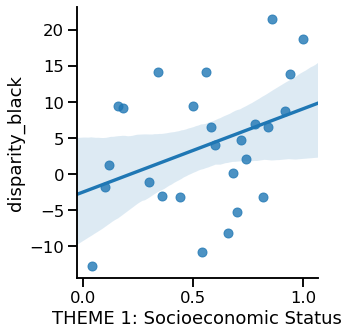

In [71]:
sns.set_context('talk')
sns.lmplot(x='THEME 1: Socioeconomic Status', y='disparity_black',data=df)

In [74]:
social_determinates = ['THEME 1: Socioeconomic Status',
       'THEME 2:\nHousehold Composition & Disability',
       'THEME 3: \nMinority Status & Language',
       'THEME 4: \nHousing Type & Transportation',
       'THEME 5: Epidemiological Factors',
       'THEME 6: Healthcare System Factors',
       'CCVI SCORE\nHigher = More Vulnerable']

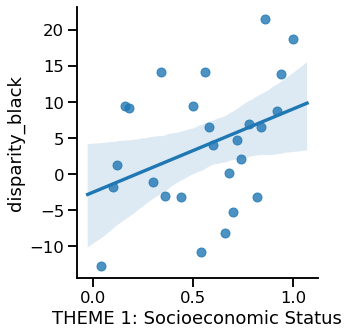

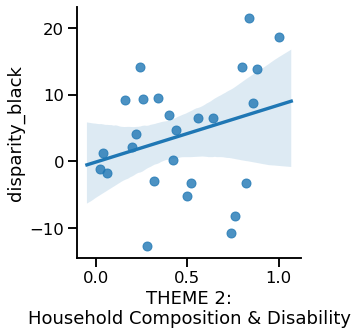

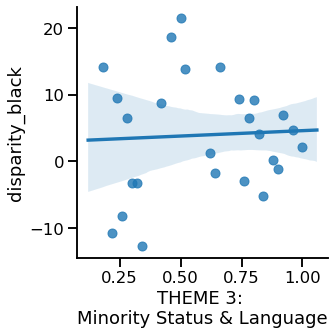

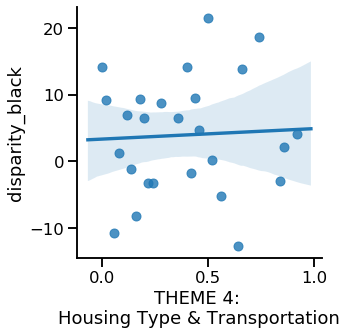

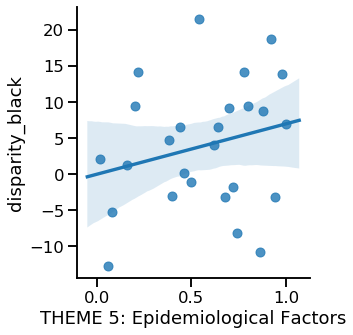

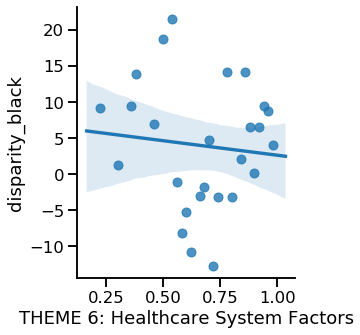

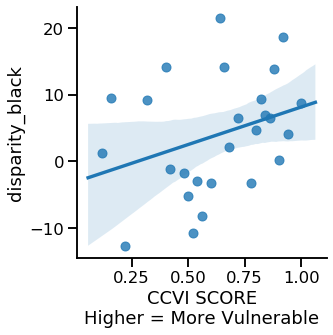

In [75]:
for x in social_determinates: 
    sns.lmplot(x=x, y='disparity_black',data=df)
    plt.plot()

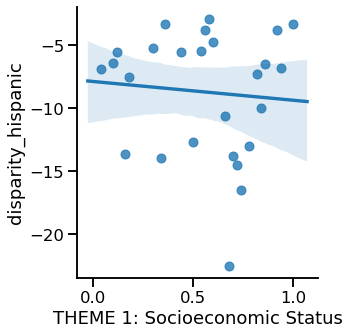

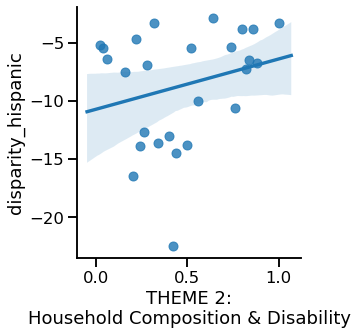

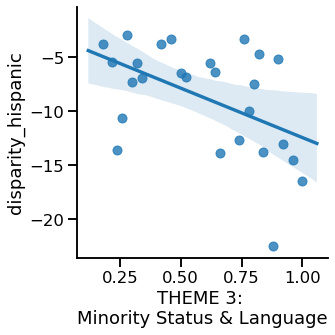

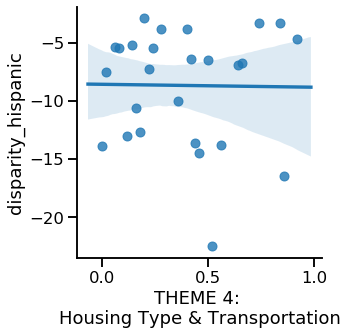

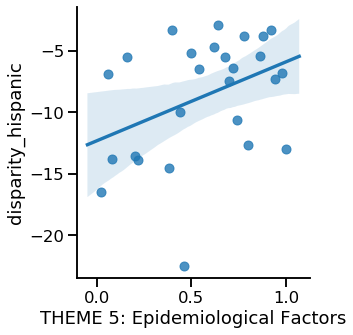

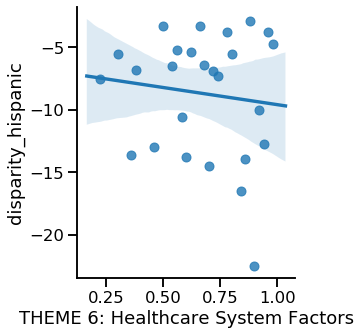

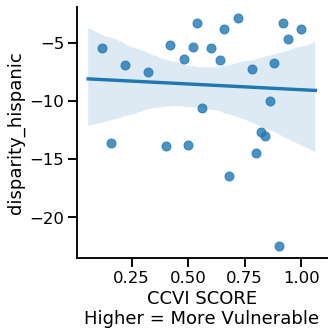

In [76]:
for x in social_determinates: 
    sns.lmplot(x=x, y='disparity_hispanic',data=df)
    plt.plot()

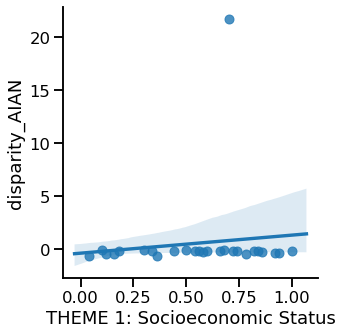

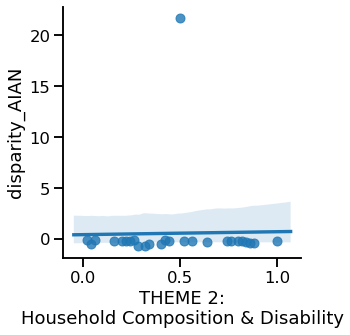

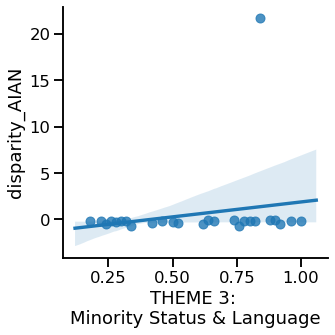

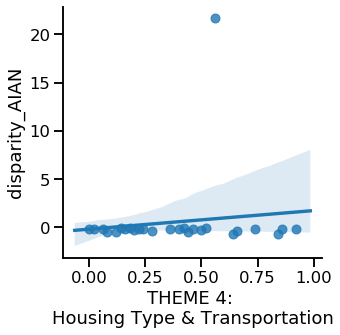

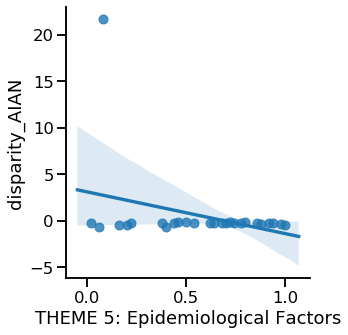

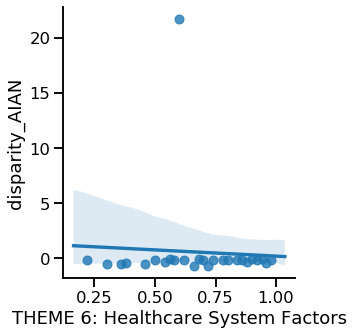

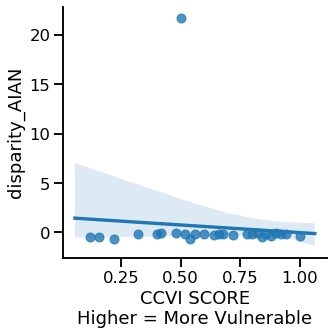

In [77]:
for x in social_determinates: 
    sns.lmplot(x=x, y='disparity_AIAN',data=df)
    plt.plot()

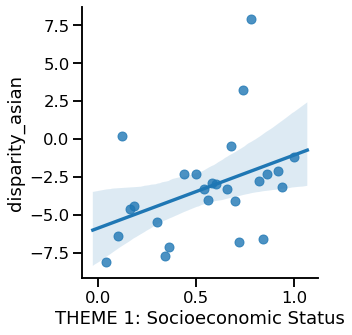

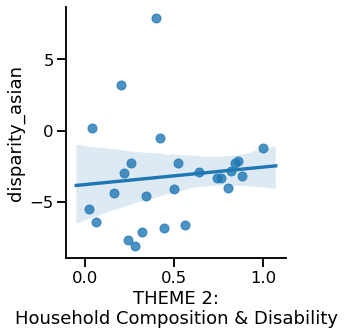

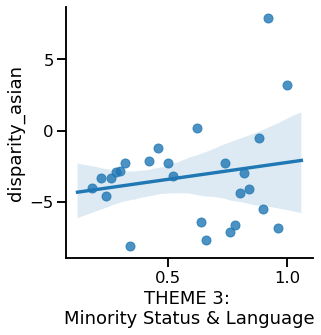

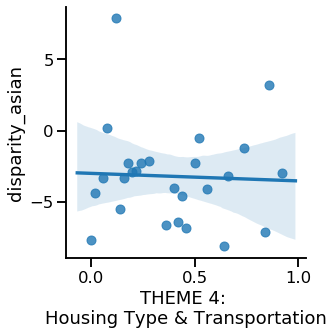

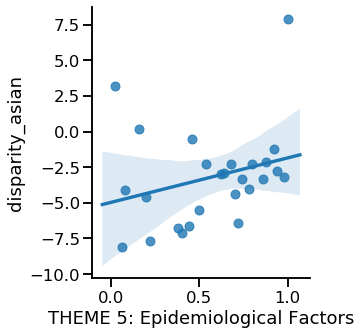

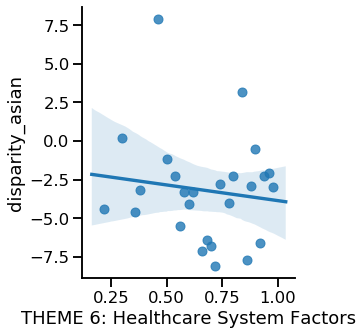

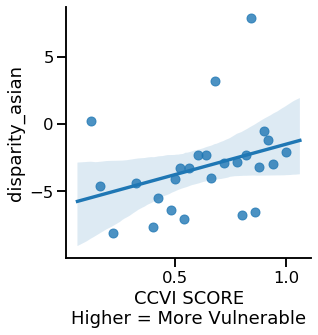

In [78]:
for x in social_determinates: 
    sns.lmplot(x=x, y='disparity_asian',data=df)
    plt.plot()

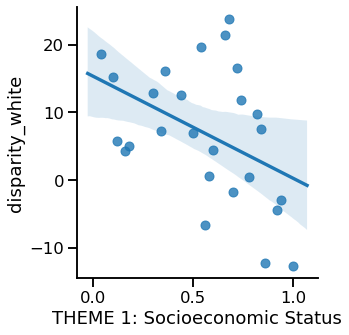

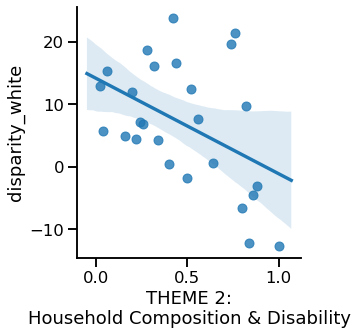

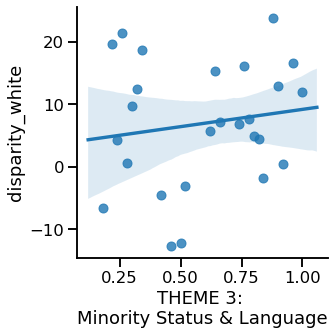

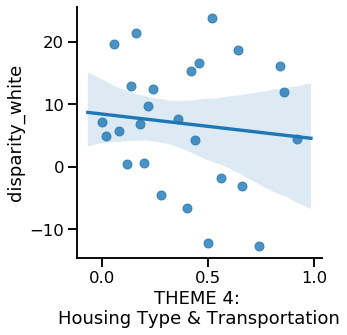

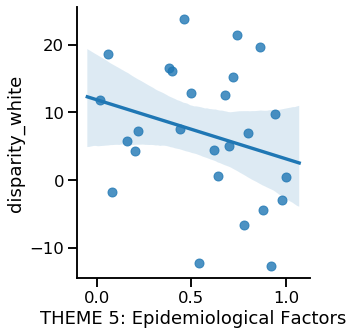

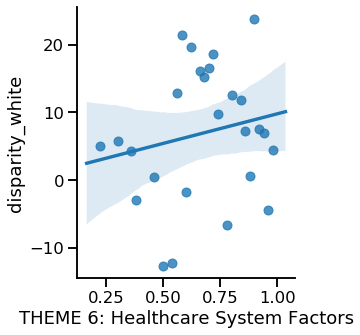

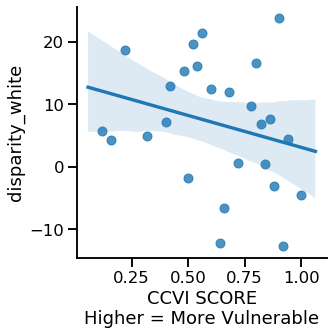

In [79]:
for x in social_determinates: 
    sns.lmplot(x=x, y='disparity_white',data=df)
    plt.plot()

## Other Notes

### Approach:
If we have information on covid cases/ethnicity per county...
- Filter the dataset to the counties where there is a disproportiate number of deaths in a certain ethnicity compared to the percentage of that ethnicity in the county. 
- Use propensity scores to weight counties that don't have disparities, but are otherwise comparible, higher. 
- Read more about propensity scores to figure out where to go from there: 
https://www.rand.org/pubs/reprints/RP1252.html

### Data: 
* Cummulative deaths (as well as patients who tested positive and negative for COVID19) per state according to race and ethnicity. Data was downloaded on May 10, 2020 from https://covidtracking.com/race
* Census type data on the overall breakdown of ethnicity and race of states. -- still needed  

## Other Data 

In [14]:
deaths = pd.read_csv('Race_data_tracker.csv')
deaths.info()
deaths.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 47 columns):
state                                493 non-null object
Last Check                           234 non-null object
Positives_Total                      348 non-null float64
Positives_race_White                 337 non-null float64
Positives_ race_Black                337 non-null float64
Positives_race_ LatinX _Hispanic     136 non-null float64
Positives_ race_Asian                280 non-null float64
Positives_ race_AIAN                 190 non-null float64
Positives_ race_NHPI                 124 non-null float64
Positives_ race_Multiracial          123 non-null float64
Positives_race_Other                 305 non-null float64
Positives_race_Unknown               337 non-null float64
Positives_race_% Unk.                342 non-null object
Positives_ethnicity_Hispanic         259 non-null float64
Positives_ethnicity_ Non-Hispanic    259 non-null float64
Positives_ethnicity_ Unknown

,state,Last Check,Positives_Total,Positives_race_White,Positives_ race_Black,Positives_race_ LatinX _Hispanic,Positives_ race_Asian,Positives_ race_AIAN,Positives_ race_NHPI,Positives_ race_Multiracial,...,Negatives_race_NHPI,Negatives_race_Multiracial,Negatives_race_Other,Negatives_race_Unknown,Negatives_race_% Unk.,Negatives_ethnicity_ Hispanic,Negatives_ethnicity_Non-Hispanic,Negatives_ethnicity_Unknown,Negatives_ethnicity_% Unk.,Unnamed: 46
0,AK,5/10/2020 22:15,379.0,238.0,9.0,NaN,45.0,24.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,5/10/2020 22:24,9889.0,4333.0,3789.0,NaN,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,5/10/2020 22:36,4012.0,1922.0,1322.0,NaN,44.0,9.0,53.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,5/10/2020 22:42,11119.0,2631.0,338.0,1889.0,123.0,1278.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
deaths.columns

Index(['state', 'Last Check', 'Positives_Total', 'Positives_race_White ',
       'Positives_ race_Black ', 'Positives_race_ LatinX _Hispanic',
       'Positives_ race_Asian', 'Positives_ race_AIAN', 'Positives_ race_NHPI',
       'Positives_ race_Multiracial ', 'Positives_race_Other',
       'Positives_race_Unknown', 'Positives_race_% Unk.',
       'Positives_ethnicity_Hispanic', 'Positives_ethnicity_ Non-Hispanic',
       'Positives_ethnicity_ Unknown', 'Positives_ethnicity_ % Unk.',
       'Deaths_Total', 'Deaths_race_White ', 'Deaths_race_Black ',
       'Deaths_race_ LatinX_Hispanic', 'Deaths_race_Asian', 'Deaths_race_AIAN',
       'Deaths_race_NHPI', 'Deaths_race_Multiracial ', 'Deaths_race_Other',
       'Deaths_race_Unknown', 'Deaths_race_% Unk.',
       'Deaths_ethnicity_Hispanic', 'Deaths_ethnicity_Non-Hispanic',
       'Deaths_ethnicity_Unknown', 'Deaths_ethnicity_% Unk.',
       'Negatives_race_White ', 'Negatives_race_Black ',
       'Negatives_race_LatinX / Hispanic', 'Neg

Data is collected as cases per day in each county. To get a sum of the cases in each county on the day of downloading data, I grouped the data by fips number. Fips number is found above and can be used to join the 2 datasets. 

In [22]:
deaths_grouped = deaths.groupby(by='state').sum()
deaths_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, AK to WY
Data columns (total 38 columns):
Positives_Total                      56 non-null float64
Positives_race_White                 56 non-null float64
Positives_ race_Black                56 non-null float64
Positives_race_ LatinX _Hispanic     56 non-null float64
Positives_ race_Asian                56 non-null float64
Positives_ race_AIAN                 56 non-null float64
Positives_ race_NHPI                 56 non-null float64
Positives_ race_Multiracial          56 non-null float64
Positives_race_Other                 56 non-null float64
Positives_race_Unknown               56 non-null float64
Positives_ethnicity_Hispanic         56 non-null float64
Positives_ethnicity_ Non-Hispanic    56 non-null float64
Positives_ethnicity_ Unknown         56 non-null float64
Deaths_Total                         56 non-null float64
Deaths_race_White                    56 non-null float64
Deaths_race_Black                    56 non-nu

In [24]:
deaths_grouped.sort_index()

,Positives_Total,Positives_race_White,Positives_ race_Black,Positives_race_ LatinX _Hispanic,Positives_ race_Asian,Positives_ race_AIAN,Positives_ race_NHPI,Positives_ race_Multiracial,Positives_race_Other,Positives_race_Unknown,...,Negatives_race_LatinX / Hispanic,Negatives_race_Asian,Negatives_race_AIAN,Negatives_race_NHPI,Negatives_race_Multiracial,Negatives_race_Other,Negatives_race_Unknown,Negatives_ethnicity_ Hispanic,Negatives_ethnicity_Non-Hispanic,Negatives_ethnicity_Unknown
state,,,,,,,,,,,,,,,,,,,,,
AK,2390.0,1334.0,49.0,0.0,268.0,128.0,50.0,59.0,52.0,450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,48752.0,22233.0,18394.0,0.0,384.0,0.0,0.0,0.0,1334.0,6397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,20440.0,10602.0,6225.0,232.0,241.0,26.0,98.0,84.0,619.0,2261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,51376.0,13089.0,1521.0,7698.0,546.0,5679.0,128.0,0.0,825.0,21890.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA,319537.0,58314.0,13890.0,93222.0,25699.0,429.0,1670.0,2073.0,14266.0,108723.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO,93443.0,45925.0,6752.0,15250.0,2511.0,454.0,481.0,1155.0,929.0,3566.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT,177399.0,54531.0,19824.0,26272.0,2428.0,0.0,0.0,0.0,1186.0,75873.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC,29305.0,5027.0,14047.0,0.0,447.0,79.0,80.0,3825.0,1124.0,4414.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
acs = pd.read_csv('ACS_data_cleaned.csv')
acs.info()
acs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
id                                                              52 non-null object
State Name                                                      52 non-null object
State Abbreviation                                              52 non-null object
Total                                                           52 non-null int64
White alone                                                     52 non-null int64
Black or African American alone                                 52 non-null int64
American Indian and Alaska Native alone                         52 non-null int64
Asian alone                                                     52 non-null int64
Native Hawaiian and Other Pacific Islander alone                52 non-null int64
Some other race alone                                           52 non-null int64
Two or more races                                               52 non-nul

,id,State Name,State Abbreviation,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races"
0,0400000US01,Alabama,AL,4887871,3306838,1307040,22063,65095,1797,84027,101011,8348,92663
1,0400000US02,Alaska,AK,737438,474555,25197,111371,46381,7958,9780,62196,3699,58497
2,0400000US04,Arizona,AZ,7171646,5590505,336340,330599,237873,15661,373688,286980,49912,237068
3,0400000US05,Arkansas,AR,3013825,2306096,456714,20951,47548,9398,84917,88201,7476,80725
4,0400000US06,California,CA,39557045,23535388,2283850,302792,5821585,155739,5453229,2004462,440705,1563757
